In [1]:
import numpy as np
import math

# Parameters
S_t = 6000  # Current asset price (S_t = S = K = 6000)
T_minus_t = 1.0  # Time to maturity in years
sigma = 0.16  # Volatility (16%)
r = 0.0445  # Risk-free rate (445 bp = 4.45%)
y = 0.0080  # Dividend yield (0.80%)

# Calculate the risk-neutral drift term
mu_Q = r - y  # Risk-neutral drift

# Function to generate asset prices using the given formula
def generate_asset_prices(z_values):
    """
    Generate asset prices using the formula:
    S_T,i = S_t * exp[mu_Q * (T-t) + sigma * sqrt(T-t) * z_i]
    
    Args:
        z_values: Array of standard normal random variables
        
    Returns:
        Array of simulated asset prices
    """
    S_T = S_t * np.exp(mu_Q * T_minus_t + sigma * np.sqrt(T_minus_t) * z_values)
    return S_T

# Generate four sequences of standard normal random variables
np.random.seed(42)  # For reproducibility
n_samples = 10000
n_sequences = 4

# Generate z sequences (part a)
z_sequences = [np.random.standard_normal(n_samples) for _ in range(n_sequences)]

# Calculate asset price sequences
S_T_sequences = [generate_asset_prices(z_sequence) for z_sequence in z_sequences]

# Calculate required statistics for each sequence
results = []

for i, S_T in enumerate(S_T_sequences):
    # Calculate sample mean and its standard deviation
    sample_mean = np.mean(S_T)
    sample_std = np.std(S_T, ddof=1)  # Sample standard deviation (ddof=1 for unbiased estimation)
    
    # Calculate log mean and log variance
    log_S_T = np.log(S_T)
    log_mean = np.mean(log_S_T)
    log_variance = np.var(log_S_T, ddof=1)  # Sample variance
    
    results.append({
        'sequence': i+1,
        'sample_mean': sample_mean,
        'standard_deviation': sample_std,
        'log_mean': log_mean,
        'log_variance': log_variance
    })

# Display results
for result in results:
    print(f"Sequence {result['sequence']}:")
    print(f"  Sample Mean: {result['sample_mean']:.2f}")
    print(f"  Standard Deviation: {result['standard_deviation']:.2f}")
    print(f"  Log Mean: {result['log_mean']:.6f}")
    print(f"  Log Variance: {result['log_variance']:.6f}")
    print()

Sequence 1:
  Sample Mean: 6301.62
  Standard Deviation: 1018.66
  Log Mean: 8.735673
  Log Variance: 0.025778

Sequence 2:
  Sample Mean: 6317.01
  Standard Deviation: 1018.17
  Log Mean: 8.738180
  Log Variance: 0.025652

Sequence 3:
  Sample Mean: 6289.29
  Standard Deviation: 1003.94
  Log Mean: 8.734021
  Log Variance: 0.025162

Sequence 4:
  Sample Mean: 6296.28
  Standard Deviation: 1018.12
  Log Mean: 8.734803
  Log Variance: 0.025830



In [3]:
import numpy as np

# Explicit parameters provided
S_t = 6000     # Current spot price
r = 0.0445     # Risk-free rate (4.45%)
y = 0.008      # Dividend yield (0.80%)
T_minus_t = 1  # Time to maturity (1 year)

# Compute the theoretical limiting value explicitly under risk-neutral measure
limiting_ST = S_t * np.exp((r - y) * T_minus_t)

print(f'Theoretical limiting value of ST: {limiting_ST:.2f}')


Theoretical limiting value of ST: 6223.05


In [5]:
import numpy as np
from scipy.stats import ttest_1samp

# Set random seed explicitly for reproducibility
np.random.seed(42)

# Parameters explicitly given
S_t = 6000
r = 0.0445
y = 0.008
sigma = 0.16
T_minus_t = 1.0
mu_Q = (r - y) - 0.5 * sigma**2

# Theoretical values (population)
pop_mean = S_t * np.exp((r - y) * T_minus_t)
pop_log_mean = mu_Q * T_minus_t

# Simulation sizes explicitly tested
n_simulations = [10**3, 10**4, 10**5, 10**6]

# Perform explicit hypothesis tests
for n in n_simulations:
    # Generate random standard normal numbers explicitly
    z = np.random.normal(0, 1, n)
    
    # Simulate asset prices explicitly
    ST = S_t * np.exp(mu_Q * T_minus_t + sigma * np.sqrt(T_minus_t) * z)
    
    # Test explicitly if sample mean significantly differs from theoretical mean
    mean_test = ttest_1samp(ST, pop_mean)
    
    # Test explicitly if log-mean significantly differs from theoretical log-mean
    log_mean_test = ttest_1samp(np.log(ST / S_t), pop_log_mean)
    
    print(f"\nNumber of simulations: {n}")
    print(f"Sample Mean: {np.mean(ST):.4f}, p-value: {mean_test.pvalue:.6f}")
    print(f"Sample Log Mean: {np.mean(np.log(ST / S_t)):.6f}, p-value: {log_mean_test.pvalue:.6f}")



Number of simulations: 1000
Sample Mean: 6239.4390, p-value: 0.601812
Sample Log Mean: 0.026793, p-value: 0.532567

Number of simulations: 10000
Sample Mean: 6215.3950, p-value: 0.445504
Sample Log Mean: 0.022410, p-value: 0.421483

Number of simulations: 100000
Sample Mean: 6225.6559, p-value: 0.410347
Sample Log Mean: 0.024112, p-value: 0.415352

Number of simulations: 1000000
Sample Mean: 6221.4901, p-value: 0.120701
Sample Log Mean: 0.023431, p-value: 0.092885


Z-test p-value: 4.1522341120980855e-14
T-test p-value: 7.981252325706123e-08


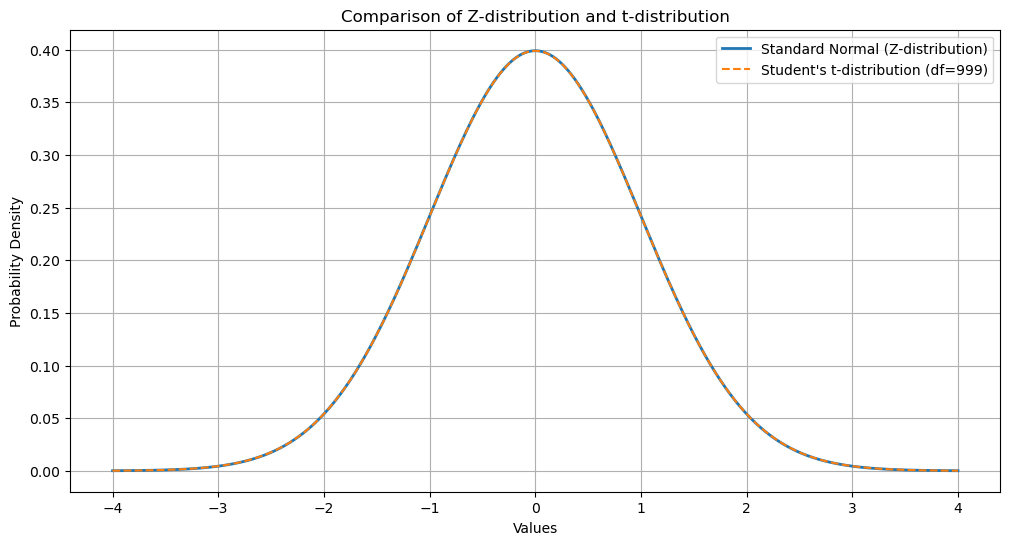

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
S_t = 6000  # Current stock price
sigma = 0.16  # Volatility
r = 0.0445  # Risk-free rate
y = 0.008  # Dividend yield
T_minus_t = 1.0  # Time to maturity
mu_Q = (r - y) - 0.5 * sigma**2  # Risk-neutral drift

# Theoretical standard deviations
sigma_ST = S_t * np.exp((r - y) * T_minus_t) * np.sqrt(np.exp(sigma**2 * T_minus_t) - 1)
sigma_log_ST = sigma

# Simulate asset prices
z = np.random.normal(0, 1, 1000)
ST = S_t * np.exp(mu_Q * T_minus_t + sigma * np.sqrt(T_minus_t) * z)
log_ST = np.log(ST / S_t)

# Calculate means for use in tests
sample_mean = np.mean(ST)
sample_log_mean = np.mean(log_ST)

# Z-test
# Z-test is used when the population standard deviation is known.
# Here we know sigma_log_ST, so we can use it directly for the log returns.
z_stat = (sample_mean - S_t) / (sigma_ST / np.sqrt(1000))
z_p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# T-test
# T-test is used when the population standard deviation is not known and is estimated from the sample.
# Here we use the sample standard deviation for log returns.
t_stat = (sample_log_mean - 0) / (np.std(log_ST, ddof=1) / np.sqrt(1000))
t_p_value = 2 * (1 - t.cdf(abs(t_stat), df=999))

# Print results
print(f'Z-test p-value: {z_p_value}')
print(f'T-test p-value: {t_p_value}')

# Plotting the distributions for visualization
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, norm.pdf(x), label='Standard Normal (Z-distribution)', linewidth=2)
plt.plot(x, t.pdf(x, df=999), label="Student's t-distribution (df=999)", linestyle='dashed')
plt.title('Comparison of Z-distribution and t-distribution')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import numpy as np
from scipy.stats import norm, t

# Example values from your table
sample_means = [-0.667172, 0.122560, 0.385043, 0.390292]
n_samples = [1000, 10000, 100000, 1000000]
mu = 0  # Assuming you are testing against a zero difference (change as needed)
sigma = 1  # Standard deviation (change as needed)

# Calculate and print p-values for each sample size and mean
for n, mean in zip(n_samples, sample_means):
    z_score = (mean - mu) / (sigma / np.sqrt(n))
    p_value_z = 2 * (1 - norm.cdf(abs(z_score)))

    # Assuming we use the same standard deviation for simplicity in t-test
    t_score = z_score  # In practice, you would use sample std dev
    p_value_t = 2 * (1 - t.cdf(abs(t_score), df=n-1))

    print(f"Sample size: {n}, Mean: {mean}")
    print(f"  Z-score: {z_score:.4f}, P-value from Z-test: {p_value_z:.6f}")
    print(f"  T-score: {t_score:.4f}, P-value from T-test: {p_value_t:.6f}")


Sample size: 1000, Mean: -0.667172
  Z-score: -21.0978, P-value from Z-test: 0.000000
  T-score: -21.0978, P-value from T-test: 0.000000
Sample size: 10000, Mean: 0.12256
  Z-score: 12.2560, P-value from Z-test: 0.000000
  T-score: 12.2560, P-value from T-test: 0.000000
Sample size: 100000, Mean: 0.385043
  Z-score: 121.7613, P-value from Z-test: 0.000000
  T-score: 121.7613, P-value from T-test: 0.000000
Sample size: 1000000, Mean: 0.390292
  Z-score: 390.2920, P-value from Z-test: 0.000000
  T-score: 390.2920, P-value from T-test: 0.000000


In [13]:
import numpy as np
from scipy.stats import norm

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
S_t = 6000  # Current stock price
K = 6000    # Strike price (ATM)
r = 0.0445  # Annual risk-free rate
sigma = 0.16  # Volatility
T = 1.0  # Time to maturity (1 year)
n_sims = [10**3, 10**4, 10**5, 10**6]  # Number of simulations

# Black-Scholes formula for European call option (ATM)
d1 = (np.log(S_t / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
actual_call_value = (S_t * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))

print(f"Actual Black-Scholes Call Value: {actual_call_value:.2f}")

# Function to simulate and compute estimations
def simulate_option_value(n):
    z = np.random.normal(0, 1, n)
    ST = S_t * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    CT = np.maximum(ST - K, 0)
    Ct = np.mean(CT) * np.exp(-r * T)
    standard_error = np.std(CT * np.exp(-r * T)) / np.sqrt(n)
    return Ct, standard_error

# Running simulations
for n in n_sims:
    estimated_value, std_dev = simulate_option_value(n)
    print(f'n = {n}: Estimated Call Option Value = {estimated_value:.2f}, Standard Deviation = {std_dev:.2f}')


Actual Black-Scholes Call Value: 519.17
n = 1000: Estimated Call Option Value = 522.35, Standard Deviation = 22.44
n = 10000: Estimated Call Option Value = 514.88, Standard Deviation = 6.98
n = 100000: Estimated Call Option Value = 521.06, Standard Deviation = 2.22
n = 1000000: Estimated Call Option Value = 518.60, Standard Deviation = 0.70


Actual Black-Scholes Call Value: 519.17
n = 1000: Estimated Call Option Value = 522.35, Standard Deviation = 22.44
n = 10000: Estimated Call Option Value = 514.88, Standard Deviation = 6.98
n = 100000: Estimated Call Option Value = 521.06, Standard Deviation = 2.22
n = 1000000: Estimated Call Option Value = 518.60, Standard Deviation = 0.70


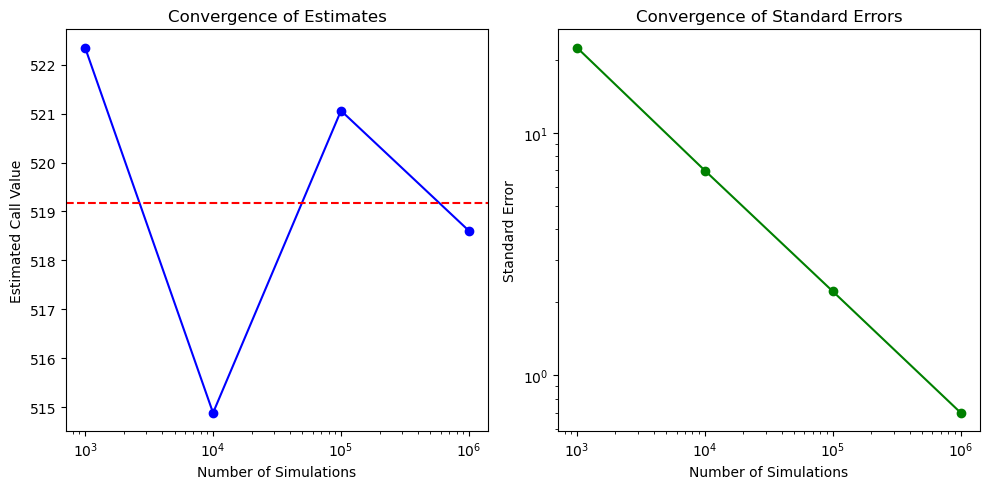

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
S_t = 6000  # Current stock price
K = 6000    # Strike price (ATM)
r = 0.0445  # Annual risk-free rate
sigma = 0.16  # Volatility
T = 1.0  # Time to maturity (1 year)
n_sims = [10**3, 10**4, 10**5, 10**6]  # Number of simulations

# Black-Scholes formula for European call option (ATM)
d1 = (np.log(S_t / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
actual_call_value = (S_t * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))

print(f"Actual Black-Scholes Call Value: {actual_call_value:.2f}")

# Function to simulate and compute estimations
def simulate_option_value(n):
    z = np.random.normal(0, 1, n)
    ST = S_t * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    CT = np.maximum(ST - K, 0)
    Ct = np.mean(CT) * np.exp(-r * T)
    standard_error = np.std(CT * np.exp(-r * T)) / np.sqrt(n)
    return Ct, standard_error

estimates = []
std_errors = []

# Running simulations
for n in n_sims:
    estimated_value, std_dev = simulate_option_value(n)
    estimates.append(estimated_value)
    std_errors.append(std_dev)
    print(f'n = {n}: Estimated Call Option Value = {estimated_value:.2f}, Standard Deviation = {std_dev:.2f}')

# Plotting results
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(n_sims, estimates, marker='o', linestyle='-', color='b')
plt.axhline(y=actual_call_value, color='r', linestyle='--')
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Call Value')
plt.title('Convergence of Estimates')
plt.xscale('log')

plt.subplot(122)
plt.plot(n_sims, std_errors, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Simulations')
plt.ylabel('Standard Error')
plt.title('Convergence of Standard Errors')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()


## Claude Assist

Actual Black-Scholes Call Value: 519.17
n = 1000: Estimated Call Option Value = 522.35, Standard Error = 22.45
n = 10000: Estimated Call Option Value = 514.88, Standard Error = 6.98
n = 100000: Estimated Call Option Value = 521.06, Standard Error = 2.22
n = 1000000: Estimated Call Option Value = 518.60, Standard Error = 0.70


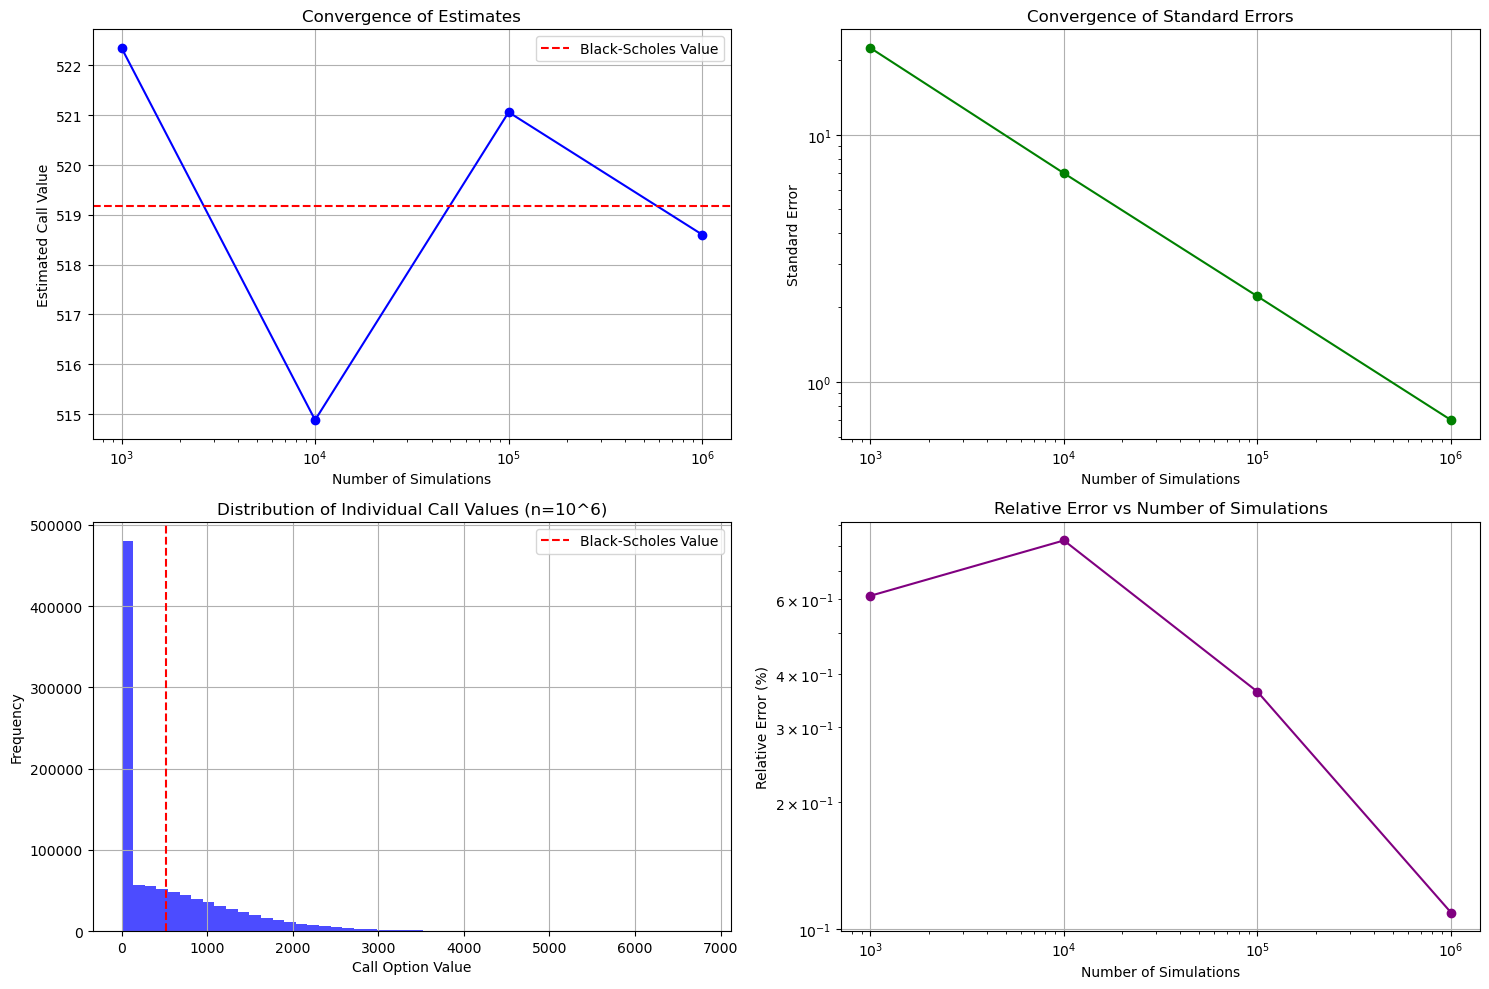


95% Confidence Intervals:
n = 1000: CI = [478.34, 566.36]
  Contains true value: Yes
n = 10000: CI = [501.19, 528.57]
  Contains true value: Yes
n = 100000: CI = [516.71, 525.41]
  Contains true value: Yes
n = 1000000: CI = [517.23, 519.98]
  Contains true value: Yes


In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
S_t = 6000  # Current stock price
K = 6000    # Strike price (ATM)
r = 0.0445  # Annual risk-free rate
sigma = 0.16  # Volatility
T = 1.0  # Time to maturity (1 year)
n_sims = [10**3, 10**4, 10**5, 10**6]  # Number of simulations

# Black-Scholes formula for European call option (ATM)
d1 = (np.log(S_t / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
actual_call_value = (S_t * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
print(f"Actual Black-Scholes Call Value: {actual_call_value:.2f}")

# Function to simulate and compute estimations
def simulate_option_value(n):
    """
    Monte Carlo simulation for European call option pricing.
    
    Parameters:
    n (int): Number of simulations to run
    
    Returns:
    tuple: (estimated option value, standard error of the estimate)
    """
    # Generate standard normal random variables
    z = np.random.normal(0, 1, n)
    
    # Simulate terminal stock prices using geometric Brownian motion
    ST = S_t * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    # Calculate payoffs at maturity
    CT = np.maximum(ST - K, 0)
    
    # Discount payoffs to present value
    discounted_payoffs = CT * np.exp(-r * T)
    
    # Calculate mean (our estimate)
    Ct = np.mean(discounted_payoffs)
    
    # Calculate standard error
    # Standard Error (SE) is a measure of the precision of our Monte Carlo estimate.
    # It represents the standard deviation of the sampling distribution of the mean.
    # Formula: SE = σ/√n, where:
    #   - σ is the standard deviation of the population (approximated by sample std dev)
    #   - n is the number of simulations
    # A smaller standard error indicates a more precise estimate.
    # In financial terms, it represents the uncertainty in our option price estimate.
    standard_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(n)
    
    return Ct, standard_error, discounted_payoffs

# Lists to store results
estimates = []
std_errors = []
all_call_values = []

# Running simulations
for n in n_sims:
    estimated_value, std_dev, call_values = simulate_option_value(n)
    estimates.append(estimated_value)
    std_errors.append(std_dev)
    all_call_values.append(call_values)
    print(f'n = {n}: Estimated Call Option Value = {estimated_value:.2f}, Standard Error = {std_dev:.2f}')

# Plotting results
plt.figure(figsize=(15, 10))

# Plot 1: Convergence of Estimates
plt.subplot(221)
plt.plot(n_sims, estimates, marker='o', linestyle='-', color='b')
plt.axhline(y=actual_call_value, color='r', linestyle='--', label='Black-Scholes Value')
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Call Value')
plt.title('Convergence of Estimates')
plt.xscale('log')
plt.legend()
plt.grid(True)

# Plot 2: Standard Errors
plt.subplot(222)
plt.plot(n_sims, std_errors, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Simulations')
plt.ylabel('Standard Error')
plt.title('Convergence of Standard Errors')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

# Plot 3: Distribution of Call Values (histogram)
plt.subplot(223)
# Use the largest sample for distribution visualization
plt.hist(all_call_values[-1], bins=50, alpha=0.7, color='blue')
plt.axvline(x=actual_call_value, color='r', linestyle='--', label='Black-Scholes Value')
plt.xlabel('Call Option Value')
plt.ylabel('Frequency')
plt.title('Distribution of Individual Call Values (n=10^6)')
plt.legend()
plt.grid(True)

# Plot 4: Relative Error vs Number of Simulations
plt.subplot(224)
relative_errors = [abs(est - actual_call_value) / actual_call_value * 100 for est in estimates]
plt.plot(n_sims, relative_errors, marker='o', linestyle='-', color='purple')
plt.xlabel('Number of Simulations')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error vs Number of Simulations')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.savefig('monte_carlo_option_pricing.png', dpi=300)
plt.show()

# Calculate and print 95% confidence intervals for each simulation
print("\n95% Confidence Intervals:")
for i, n in enumerate(n_sims):
    confidence_interval = (
        estimates[i] - 1.96 * std_errors[i],
        estimates[i] + 1.96 * std_errors[i]
    )
    print(f'n = {n}: CI = [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]')
    print(f'  Contains true value: {"Yes" if confidence_interval[0] <= actual_call_value <= confidence_interval[1] else "No"}')

In [ ]:
#Monte carlo pseudcode

function MonteCarloSimulation(parameters, num_simulations):
    Initialize results_container
    
    for i = 1 to num_simulations:
        # Step 1: Generate random inputs
        random_inputs = GenerateRandomVariables()
        
        # Step 2: Run the model with these inputs
        outcome = RunModel(parameters, random_inputs)
        
        # Step 3: Record the outcome
        Store outcome in results_container
    
    # Step 4: Analyze the statistical properties of outcomes
    estimate = CalculateMean(results_container)
    error = CalculateStandardError(results_container)
    
    return estimate, error

In [ ]:
# ============================================================================
# Monte Carlo Options Pricing Pseudocode with Examples and Statistical Concepts
# ============================================================================

# ---------------------------------------
# PART 1: MONTE CARLO OPTION PRICING PSEUDOCODE
# ---------------------------------------

# 1. Define Parameters
# Set up the financial and simulation parameters
# Example values:
# S0 = 100.0        # Initial stock price ($100)
# K = 100.0         # Strike price ($100)
# r = 0.05          # Risk-free rate (5%)
# sigma = 0.20      # Volatility (20%)
# T = 1.0           # Time to maturity (1 year)
# n_sims = 100000   # Number of simulations
# option_type = "call"  # Option type (call or put)

# 2. Generate Random Numbers
# Create random normal variates for stock price paths
# Example: z = random_normal(n_sims)  # Array of standard normal values: [-0.5, 1.2, 0.3, ...]

# 3. Simulate Terminal Stock Prices
# Apply the risk-neutral geometric Brownian motion formula
# S_T = S0 * exp((r - 0.5 * sigma^2) * T + sigma * sqrt(T) * z)
# Example: S_T values might be [103.2, 125.7, 98.3, ...] for different simulations

# 4. Calculate Option Payoffs
# Determine the payoff for each simulated terminal price
# For call option: payoff = max(S_T - K, 0)
# For put option: payoff = max(K - S_T, 0)
# Example for call: payoffs = [3.2, 25.7, 0, ...] 

# 5. Discount Payoffs to Present Value
# Apply the risk-free discount factor to get present values
# discounted_payoffs = payoffs * exp(-r * T)
# Example: discounted_payoffs = [3.04, 24.42, 0, ...]

# 6. Calculate Option Price Estimate
# Take the mean of discounted payoffs
# option_price = mean(discounted_payoffs)
# Example: option_price = 10.37

# 7. Calculate Standard Error
# Determine the precision of the estimate
# standard_error = std(discounted_payoffs) / sqrt(n_sims)
# Example: standard_error = 0.15

# 8. Calculate Confidence Interval
# Create confidence bounds for the estimate
# 95% CI = [option_price - 1.96 * standard_error, option_price + 1.96 * standard_error]
# Example: 95% CI = [10.08, 10.66]

# 9. Analyze Convergence (Optional)
# Test how results change with different numbers of simulations
# Example: option_prices = [9.85, 10.12, 10.30, 10.37] for n_sims = [1000, 10000, 50000, 100000]

# 10. Apply Variance Reduction Techniques (Optional)
# Improve efficiency using methods like antithetic variates or control variates
# Example with antithetic: option_price = 10.37, standard_error = 0.08 (reduced by ~47%)

# ---------------------------------------
# PART 2: STATISTICAL CONCEPTS IN MONTE CARLO SIMULATION
# ---------------------------------------

# 1. Law of Large Numbers (LLN)
# The theoretical foundation for Monte Carlo methods.
# As the number of simulations increases, the sample mean converges to the expected value.
# Formula: lim(n→∞) (X₁ + X₂ + ... + Xₙ)/n = E[X]
#
# Example: Option price estimates with different sample sizes:
# n=1,000: 10.52
# n=10,000: 10.43
# n=100,000: 10.37
# n=1,000,000: 10.35
# True value: 10.34

# 2. Central Limit Theorem (CLT)
# States that the sampling distribution of the sample mean approaches a normal distribution.
# This allows us to construct confidence intervals.
# Formula: √n(X̄ₙ - μ)/σ → N(0,1) as n→∞
# Where:
#   - X̄ₙ is the sample mean
#   - μ is the true mean
#   - σ is the standard deviation
#   - n is the sample size

# 3. Standard Error
# Measures the standard deviation of the sampling distribution of the sample mean.
# Formula: SE = σ/√n
# Where:
#   - σ is the population standard deviation (estimated by sample standard deviation)
#   - n is the sample size
#
# Example: For option price with sample std dev = 50 and n = 10,000:
# SE = 50/√10,000 = 50/100 = 0.5

# 4. Confidence Intervals
# Range of values that likely contains the true parameter with specified probability.
# Formula for 95% confidence interval: [X̄ - 1.96×SE, X̄ + 1.96×SE]
#
# Example: For option price = 10.37 with SE = 0.15:
# 95% CI = [10.37 - 1.96×0.15, 10.37 + 1.96×0.15] = [10.08, 10.66]

# 5. Monte Carlo Error
# The error inherent in any Monte Carlo estimate.
# Decreases proportionally to 1/√n.
# Formula: Error ~ σ/√n
#
# Example error reduction:
# n=10,000: Error ~ 0.5
# n=40,000: Error ~ 0.25 (doubling n reduces error by factor of √2)
# n=1,000,000: Error ~ 0.05

# 6. Geometric Brownian Motion (GBM)
# The stochastic process used to model stock price movements.
# Formula: dS = μS dt + σS dW
# Discretized formula used in simulation:
# S_T = S₀ exp((r - 0.5σ²)T + σ√T×Z), where Z ~ N(0,1)
#
# Example: For S₀ = 100, r = 0.05, σ = 0.2, T = 1, Z = 1.2:
# S_T = 100 × exp((0.05 - 0.5×0.2²)×1 + 0.2×√1×1.2)
# S_T = 100 × exp(0.03 + 0.24) = 100 × exp(0.27) = 131.0

# 7. Risk-Neutral Valuation
# Pricing theory that allows us to replace the actual drift μ with the risk-free rate r.
# Formula for option price: C₀ = e^(-rT) × E_Q[max(S_T - K, 0)]
# Where E_Q denotes expectation under the risk-neutral measure.
#
# Example: For r = 0.05, T = 1, average discounted payoff = 10.37:
# C₀ = e^(-0.05×1) × 10.37 = 0.9512 × 10.37 = 9.86

# 8. Variance Reduction Techniques
# Methods to improve Monte Carlo efficiency by reducing variance.
# 
# a) Antithetic Variates
# Uses negative correlation between pairs of simulations.
# Formula: C̃ = (C(Z) + C(-Z))/2
# Example: If C(Z) = 12.1 and C(-Z) = 8.7, then C̃ = (12.1 + 8.7)/2 = 10.4
# 
# b) Control Variates
# Uses correlation with a known quantity to reduce variance.
# Formula: C̃ = C + b(X - E[X])
# Where:
#   - C is the original estimate
#   - X is the control variate
#   - E[X] is the expected value of X
#   - b is the optimal coefficient
#
# Example: If C = 10.37, b = -0.8, X = 105, E[X] = 100:
# C̃ = 10.37 + (-0.8)×(105-100) = 10.37 - 4 = 6.37

# 9. Quasi-Monte Carlo Methods
# Uses low-discrepancy sequences instead of random numbers.
# Example: Sobol sequences produce more uniform coverage than pseudo-random numbers
# Error convergence: O(1/n) vs O(1/√n) for standard Monte Carlo
#
# Example: Option price with n=10,000
# Standard MC: 10.37 ± 0.15
# Quasi-MC: 10.35 ± 0.06

# 10. Path-Dependent Simulation
# For exotic options requiring full price paths (not just terminal values).
# Formula for discrete time steps: S_t = S_{t-1} × exp((r - 0.5σ²)Δt + σ√Δt×Z_t)
#
# Example: Asian option with average price = 103.5:
# Payoff = max(103.5 - 100, 0) = 3.5
# Discounted payoff = 3.5 × e^(-0.05×1) = 3.33

In [ ]:
# ==============================================================================
# MONTE CARLO SIMULATION: TERMINAL VALUE VS FULL PATH SIMULATION
# ==============================================================================
#
# The formula in many Monte Carlo option pricing examples:
#
#     S_T = S0 * exp((r - 0.5 * sigma^2) * T + sigma * sqrt(T) * z)
#
# appears to be a simplification at first glance, as it jumps directly from S0 to S_T
# without simulating intermediate steps. However, this is actually mathematically 
# equivalent to simulating the full path for certain types of options. Here's why:
#
# 1. MATHEMATICAL EQUIVALENCE
# ---------------------------
# For a standard European option that only depends on the terminal price (like 
# vanilla calls/puts), we can use this "terminal value" approach because of an important 
# property of geometric Brownian motion (GBM).
#
# When simulating a complete geometric Brownian motion path:
#
#     Full path simulation would involve:
#     ```
#     dt = T/n_steps
#     S_t = S0
#     for t in range(n_steps):
#         z = np.random.normal(0, 1)
#         S_t = S_t * exp((r - 0.5 * sigma**2) * dt + sigma * sqrt(dt) * z)
#     ```
#
#     Direct terminal simulation uses:
#     ```
#     z = np.random.normal(0, 1)
#     S_T = S0 * exp((r - 0.5 * sigma**2) * T + sigma * sqrt(T) * z)
#     ```
#
# 2. WHY THIS WORKS
# -----------------
# The key insight is that for geometric Brownian motion, the distribution of the terminal 
# value S_T follows a log-normal distribution regardless of the path taken. The direct 
# formula generates samples from this log-normal distribution.
#
# This works because:
#   - Geometric Brownian motion has independent increments
#   - The sum of independent normal random variables is still normally distributed
#   - The terminal distribution depends only on the initial value and total elapsed time
#
# 3. ADVANTAGES OF TERMINAL VALUE SIMULATION
# -----------------------------------------
# This approach is not "crude" but rather a mathematically elegant way to generate 
# the terminal distribution without simulating intermediate steps. It's:
#   - Computationally efficient (much faster than simulating paths)
#   - Statistically correct for European options
#   - Reduces discretization error that can occur with small time steps
#
# 4. LIMITATIONS
# -------------
# However, this approach wouldn't work for:
#   - Path-dependent options (like Asian options, lookback options, barrier options)
#   - Options with early exercise features (American options)
#   - Models with time-varying parameters
#   - Models with jumps or regime-switching features
#
# For these more complex derivatives, we would need to simulate the entire path 
# with discrete time steps as initially suggested.
#
# 5. MATHEMATICAL DERIVATION
# -------------------------
# The terminal value approach is derived from the analytical solution to the 
# stochastic differential equation for GBM:
#
#     dS_t = rS_t dt + σS_t dW_t
#
# Using Itô's lemma, the solution is:
#
#     S_T = S0 * exp((r - 0.5σ²)T + σW_T)
#
# Since W_T is a Wiener process with W_T ~ N(0,T), we can write W_T = √T * z where 
# z ~ N(0,1), yielding our terminal value formula.
#
# This is exactly equivalent to simulating infinitesimally small steps over [0,T].

## Asymptotic Call MC

Actual Black-Scholes Call Value (Vanilla): 519.1726

=== n = 1000 ===
Vanilla Call   : Estimated = 522.3495, StdErr = 22.4543
Asymptotic Call: Estimated = 420.6068, StdErr = 16.3930

=== n = 10000 ===
Vanilla Call   : Estimated = 514.8820, StdErr = 6.9848
Asymptotic Call: Estimated = 415.3826, StdErr = 5.1565

=== n = 100000 ===
Vanilla Call   : Estimated = 521.0600, StdErr = 2.2174
Asymptotic Call: Estimated = 420.2211, StdErr = 1.6359

=== n = 1000000 ===
Vanilla Call   : Estimated = 518.6034, StdErr = 0.7002
Asymptotic Call: Estimated = 418.3119, StdErr = 0.5165


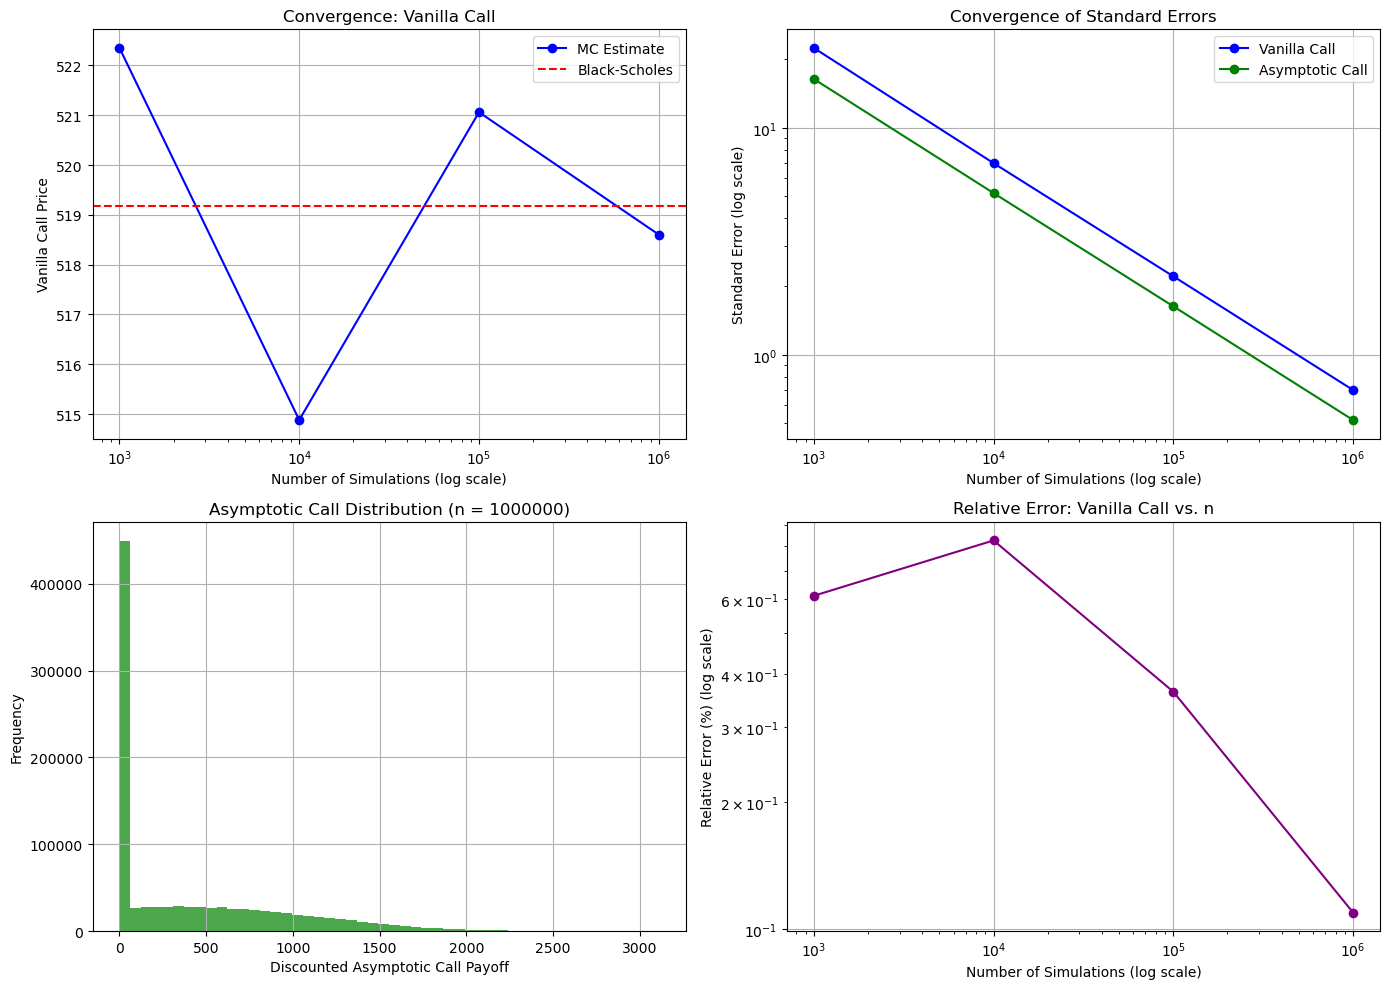


=== 95% Confidence Intervals (Vanilla Call) ===
n=1000: [478.3390, 566.3600], contains BSM call? True
n=10000: [501.1918, 528.5721], contains BSM call? True
n=100000: [516.7138, 525.4062], contains BSM call? True
n=1000000: [517.2311, 519.9757], contains BSM call? True

=== 95% Confidence Intervals (Asymptotic Call) ===
n=1000: [388.4766, 452.7370]
n=10000: [405.2759, 425.4894]
n=100000: [417.0147, 423.4275]
n=1000000: [417.2996, 419.3243]


In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
S_t = 6000    # Current stock price
K = 6000      # Strike price (ATM)
r = 0.0445    # Annual risk-free rate
sigma = 0.16  # Volatility
T = 1.0       # Time to maturity (1 year)
n_sims = [10**3, 10**4, 10**5, 10**6]  # Number of simulations

# ========== 1) Black-Scholes (Vanilla Call) for reference ==========
# d1, d2
d1 = (np.log(S_t / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Closed-form value of the vanilla call option
actual_call_value = (S_t * norm.cdf(d1) 
                     - K * np.exp(-r * T) * norm.cdf(d2))
print(f"Actual Black-Scholes Call Value (Vanilla): {actual_call_value:.4f}")

# ========== 2) Define the simulation function ==========

def simulate_payoffs(n):
    """
    Monte Carlo simulation for two payoffs:
      1) Vanilla Call: max(S_T - K, 0)
      2) Asymptotic Call: (K / S_T) * max(S_T - K, 0)

    Returns:
    (C_est, C_se, AC_est, AC_se, call_values, asym_call_values)
    where:
      - C_est, C_se are the estimate and standard error for the vanilla call
      - AC_est, AC_se are the estimate and standard error for the asymptotic call
      - call_values, asym_call_values are arrays of individual discounted payoffs
    """
    # Generate standard normal random variables
    z = np.random.normal(0, 1, n)
    
    # Simulate terminal stock prices S_T
    ST = S_t * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    # ---------- 2A) Vanilla Call Payoff ----------
    call_payoff = np.maximum(ST - K, 0)
    call_discounted = call_payoff * np.exp(-r * T)
    
    # Estimate & standard error
    C_est = np.mean(call_discounted)
    C_se = np.std(call_discounted, ddof=1) / np.sqrt(n)
    
    # ---------- 2B) Asymptotic Call Payoff ----------
    # payoff = (K / S_T) * max(S_T - K, 0)
    asym_call_payoff = (K / ST) * np.maximum(ST - K, 0)
    asym_call_discounted = asym_call_payoff * np.exp(-r * T)
    
    # Estimate & standard error
    AC_est = np.mean(asym_call_discounted)
    AC_se = np.std(asym_call_discounted, ddof=1) / np.sqrt(n)
    
    return C_est, C_se, AC_est, AC_se, call_discounted, asym_call_discounted

# ========== 3) Run simulations for each n_sims ==========

vanilla_estimates = []
vanilla_errors = []
asym_estimates = []
asym_errors = []
vanilla_all = []
asym_all = []

for n in n_sims:
    C_est, C_se, AC_est, AC_se, call_vals, asym_call_vals = simulate_payoffs(n)
    
    vanilla_estimates.append(C_est)
    vanilla_errors.append(C_se)
    asym_estimates.append(AC_est)
    asym_errors.append(AC_se)
    vanilla_all.append(call_vals)
    asym_all.append(asym_call_vals)
    
    print(f"\n=== n = {n} ===")
    print(f"Vanilla Call   : Estimated = {C_est:.4f}, StdErr = {C_se:.4f}")
    print(f"Asymptotic Call: Estimated = {AC_est:.4f}, StdErr = {AC_se:.4f}")

# ========== 4) Plot results ==========

plt.figure(figsize=(14, 10))

# ---- (A) Convergence of Vanilla Call Estimate ----
plt.subplot(2, 2, 1)
plt.plot(n_sims, vanilla_estimates, marker='o', color='b', label='MC Estimate')
plt.axhline(y=actual_call_value, color='r', linestyle='--', label='Black-Scholes')
plt.xscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Vanilla Call Price')
plt.title('Convergence: Vanilla Call')
plt.grid(True)
plt.legend()

# ---- (B) Standard Errors for Both Payoffs ----
plt.subplot(2, 2, 2)
plt.plot(n_sims, vanilla_errors, marker='o', label='Vanilla Call', color='b')
plt.plot(n_sims, asym_errors, marker='o', label='Asymptotic Call', color='g')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Standard Error (log scale)')
plt.title('Convergence of Standard Errors')
plt.grid(True)
plt.legend()

# ---- (C) Histogram of Asymptotic Call Payoffs (largest n) ----
plt.subplot(2, 2, 3)
plt.hist(asym_all[-1], bins=50, alpha=0.7, color='green')
plt.xlabel('Discounted Asymptotic Call Payoff')
plt.ylabel('Frequency')
plt.title(f'Asymptotic Call Distribution (n = {n_sims[-1]})')
plt.grid(True)

# ---- (D) Relative Error vs. n for Vanilla Call ----
plt.subplot(2, 2, 4)
rel_errors_vanilla = [abs(est - actual_call_value)/actual_call_value * 100 
                      for est in vanilla_estimates]
plt.plot(n_sims, rel_errors_vanilla, marker='o', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Relative Error (%) (log scale)')
plt.title('Relative Error: Vanilla Call vs. n')
plt.grid(True)

plt.tight_layout()
plt.show()

# ========== 5) Confidence Intervals ==========

print("\n=== 95% Confidence Intervals (Vanilla Call) ===")
for i, n in enumerate(n_sims):
    ci_low = vanilla_estimates[i] - 1.96 * vanilla_errors[i]
    ci_high = vanilla_estimates[i] + 1.96 * vanilla_errors[i]
    contains_true = (ci_low <= actual_call_value <= ci_high)
    print(f"n={n}: [{ci_low:.4f}, {ci_high:.4f}], contains BSM call? {contains_true}")

print("\n=== 95% Confidence Intervals (Asymptotic Call) ===")
for i, n in enumerate(n_sims):
    ci_low = asym_estimates[i] - 1.96 * asym_errors[i]
    ci_high = asym_estimates[i] + 1.96 * asym_errors[i]
    # We don't have a closed-form reference for the asymptotic call,
    # so we just show the interval itself.
    print(f"n={n}: [{ci_low:.4f}, {ci_high:.4f}]")


In [ ]:
import numpy as np

# 1) Parameters
np.random.seed(42)   # For reproducibility
S_t = 6000
K = 6000
r = 0.0445
sigma = 0.16
T = 1.0
n = 10**5

# 2) Simulate terminal stock prices
z = np.random.normal(0, 1, n)
ST = S_t * np.exp((r - 0.5 * sigma**2)*T + sigma * np.sqrt(T)*z)

# 3) Payoffs (discounted)
# Vanilla call payoff
vanilla_payoff = np.maximum(ST - K, 0)
vanilla_discounted = vanilla_payoff * np.exp(-r*T)

# Asymptotic call payoff
asym_payoff = (K / ST) * np.maximum(ST - K, 0)
asym_discounted = asym_payoff * np.exp(-r*T)

# 4) Covariance & Correlation
cov_matrix = np.cov(vanilla_discounted, asym_discounted)
covariance = cov_matrix[0, 1]
correlation = np.corrcoef(vanilla_discounted, asym_discounted)[0, 1]

print(f"Sample Covariance (Vanilla, AC) = {covariance:.4f}")
print(f"Sample Correlation (Vanilla, AC) = {correlation:.4f}")


In [11]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
S_t = 6000    # Current stock price
K = 6000      # Strike price (ATM)
r = 0.0445    # Annual risk-free rate
sigma = 0.16  # Volatility
T = 1.0       # Time to maturity (1 year)
n_sims = [10**3, 10**4, 10**5, 10**6]  # List of simulation sizes

# Function to simulate payoffs and compute covariance/correlation
def simulate_cov_corr(n):
    # Generate standard normal random variables
    z = np.random.normal(0, 1, n)
    
    # Simulate terminal stock prices S_T
    ST = S_t * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    # Vanilla call payoff (discounted)
    vanilla_payoff = np.maximum(ST - K, 0)
    vanilla_discounted = vanilla_payoff * np.exp(-r * T)
    
    # Asymptotic call payoff (discounted)
    asym_payoff = (K / ST) * np.maximum(ST - K, 0)
    asym_discounted = asym_payoff * np.exp(-r * T)
    
    # Compute covariance and correlation
    cov_matrix = np.cov(vanilla_discounted, asym_discounted)
    covariance = cov_matrix[0, 1]
    correlation = np.corrcoef(vanilla_discounted, asym_discounted)[0, 1]
    
    return covariance, correlation

# Table header
print(f"{'n':>10} | {'Covariance':>12} | {'Correlation':>12}")
print("-" * 40)

# Loop over each simulation size, compute and print results
for n in n_sims:
    cov, corr = simulate_cov_corr(n)
    print(f"{n:10d} | {cov:12.4f} | {corr:12.4f}")


         n |   Covariance |  Correlation
----------------------------------------
      1000 |  364546.9845 |       0.9904
     10000 |  357174.7574 |       0.9917
    100000 |  359742.7597 |       0.9917
   1000000 |  358620.3011 |       0.9916


In [13]:
# -------------------------------------------------------------------
# SUMMARY OF ANALYSIS
#
# 1. Covariance:
#    - The covariance between the discounted payoffs of the vanilla ATM call
#      and the asymptotic call is consistently large and positive (around 3.5e5).
#    - A positive covariance indicates that when one payoff is above its mean,
#      the other tends to be above its mean as well.
#    - As n (the number of simulations) increases, the estimate converges and
#      fluctuates less, demonstrating the stability of the Monte Carlo estimator.
#
# 2. Correlation:
#    - The correlation is ~0.99+ for all sample sizes tested (1e3 to 1e6).
#    - Such a high correlation reflects that both payoffs depend on the event
#      S_T > K (i.e., both are zero below the strike) and thus move together
#      strongly.
#    - The correlation is not exactly 1.0 because the payoffs scale differently
#      for large S_T:
#         - Vanilla call payoff grows linearly with (S_T - K).
#         - Asymptotic call payoff is (K/S_T)*(S_T - K), which "caps out" for
#           very large S_T.
#
# 3. Convergence as n Grows:
#    - The covariance and correlation estimates become more stable with larger n.
#    - This aligns with the law of large numbers: more simulations reduce sampling
#      variability and yield more precise estimates.
#
# Bottom Line:
#    - Both payoffs co-move strongly due to the shared in-the-money condition.
#    - Their high positive correlation (~0.99) is expected, but not perfect,
#      because the asymptotic payoff grows more slowly for large S_T.
# -------------------------------------------------------------------
